# Text Mining (Day 1)

#### Dataset link: https://github.com/skathirmani/datasets

In [1]:
import pandas as pd
import nltk

In [2]:
url = 'https://github.com/skathirmani/datasets/raw/master/narendramodi_tweets.csv'
tweets = pd.read_csv(url)

In [8]:
tweets.head(1)

,id,retweets_count,favorite_count,created_at,text,lang,retweeted,followers_count,friends_count,hashtags_count,description,location,background_image_url,source
0,8.263846e+17,1406.0,4903.0,2017-01-31 11:00:07,The President's address wonderfully encapsulat...,en,False,26809964.0,1641.0,1.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client


In [4]:
tweets.to_csv('tweets.csv', index=False)

In [9]:
tweets.shape

(3220, 14)

In [10]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 14 columns):
id                      3220 non-null float64
retweets_count          3220 non-null float64
favorite_count          3220 non-null float64
created_at              3220 non-null object
text                    3220 non-null object
lang                    3220 non-null object
retweeted               3220 non-null bool
followers_count         3220 non-null float64
friends_count           3220 non-null float64
hashtags_count          3220 non-null float64
description             3220 non-null object
location                3220 non-null object
background_image_url    3220 non-null object
source                  3220 non-null object
dtypes: bool(1), float64(6), object(7)
memory usage: 330.3+ KB


![modiwordcloud](modi_wordcloud.PNG)

In [ ]:
pd.read_csv('')

In [11]:
tweets['text'].head()

0    The President's address wonderfully encapsulat...
1    Rashtrapati Ji's address to both Houses of Par...
2    RT @PMOIndia: Empowering the marginalised. htt...
3    RT @PMOIndia: Commitment to welfare of farmers...
4    RT @PMOIndia: Improving the quality of life fo...
Name: text, dtype: object

## Building Corpus

In [40]:
docs = tweets['text']
docs = docs.str.lower()

### Regular expression

In [19]:
docs[0].replace('the', '--')

"-- president's address wonderfully encapsulated india's strengths, aspirations, potential &amp; -- efforts towards #transformingindia."

In [20]:
docs[0].replace('the', '')

" president's address wonderfully encapsulated india's strengths, aspirations, potential &amp;  efforts towards #transformingindia."

In [24]:
docs.str.replace('[a-z]', '').head()

0           '    ' , ,  &;    #.
1     '        - &; .  . ://./ @
2                 @:   . ://./94
3                @:     . ://./7
4          @:        . ://./8252
Name: text, dtype: object

In [25]:
docs.str.replace('[0-9]', '').head()

0    the president's address wonderfully encapsulat...
1    rashtrapati ji's address to both houses of par...
2    rt @pmoindia: empowering the marginalised. htt...
3    rt @pmoindia: commitment to welfare of farmers...
4    rt @pmoindia: improving the quality of life fo...
Name: text, dtype: object

In [27]:
docs.str.replace('[^a-z ]', '').head()

0    the presidents address wonderfully encapsulate...
1    rashtrapati jis address to both houses of parl...
2    rt pmoindia empowering the marginalised httpst...
3    rt pmoindia commitment to welfare of farmers h...
4    rt pmoindia improving the quality of life for ...
Name: text, dtype: object

In [28]:
docs.str.replace('[^a-z0-9 ]', '').head()

0    the presidents address wonderfully encapsulate...
1    rashtrapati jis address to both houses of parl...
2    rt pmoindia empowering the marginalised httpst...
3    rt pmoindia commitment to welfare of farmers h...
4    rt pmoindia improving the quality of life for ...
Name: text, dtype: object

In [41]:
docs = docs.str.replace('[^a-z#@ ]', '')
docs.head()

0    the presidents address wonderfully encapsulate...
1    rashtrapati jis address to both houses of parl...
2    rt @pmoindia empowering the marginalised https...
3    rt @pmoindia commitment to welfare of farmers ...
4    rt @pmoindia improving the quality of life for...
Name: text, dtype: object

In [42]:
docs = docs.str.split(' ')

In [43]:
words_rows = docs.tolist()

In [44]:
len(words_rows)

3220

In [45]:
words_all = []
for row in words_rows:
    words_all.extend(row)
len(words_all)

56862

In [52]:
#words_all[:30]

In [53]:
words_all = pd.Series(words_all)
words_all.head()

0             the
1      presidents
2         address
3     wonderfully
4    encapsulated
dtype: object

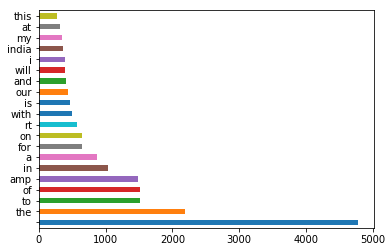

In [58]:
%matplotlib inline
words_all.value_counts().head(20).plot.barh()

In [73]:
import numpy as np
common_stop_words = nltk.corpus.stopwords.words('english')
custom_stop_words = ['', 'amp', 'rt']
stop_words_all = np.hstack([common_stop_words, custom_stop_words])
len(stop_words_all)

182

In [78]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
stemmer.stem('playing')

'play'

In [103]:
docs = tweets['text']
docs = docs.str.lower()
docs = docs.str.replace('[^a-z#@ ]', '')
docs = docs.str.split(' ')
words_rows = docs.tolist()
words_all = []
words_rows_clean = []
docs_clean = []
for row in words_rows:
    row_words = [stemmer.stem(word) for word in row if word not in stop_words_all]  
    words_rows_clean.append(row_words)
    docs_clean.append(' '.join(row_words))
    words_all.extend(row_words)
words_all = pd.Series(words_all)
#words_all.value_counts().head(20).plot.barh()

In [104]:
len(words_all)

32422

In [106]:
#words_rows_clean[:2]
docs_clean[:2]

['presid address wonder encapsul india strength aspir potenti effort toward #transformingindia',
 'rashtrapati ji address hous parliament indepth extens hear httpstcordkqtjgnnx @rashtrapatibhvn']

In [66]:
#nltk.download('stopwords')

In [108]:
print(len(words_all))
print(len(words_rows_clean))
print(len(docs_clean))

32422
3220
3220


## Document Term Matrix

Unstructured data to structed data

- Documents in Rows
- Terms/Words in columns
- High dimensional data
- Sparse matrix

In [109]:
from sklearn.feature_extraction.text import CountVectorizer

In [112]:
model = CountVectorizer()
sparse_matrix = model.fit_transform(docs_clean)
sparse_matrix

<3220x7340 sparse matrix of type '<class 'numpy.int64'>'
	with 31644 stored elements in Compressed Sparse Row format>

In [116]:
3220 * 7340 #(no. of rows x no. of columns)
31644 / (3220 * 7340*1.0) * 100 #Percentage of non zero elements

0.13388731869954473

In [117]:
sparse_matrix.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [120]:
model.get_feature_names()[:5]

['aabhar', 'aadhaar', 'aadhar', 'aajtak', 'aamirkhan']

In [132]:
from sklearn.feature_extraction.text import CountVectorizer
model = CountVectorizer()
sparse_matrix = model.fit_transform(docs_clean)
dtm = pd.DataFrame(sparse_matrix.toarray(),
                   columns=model.get_feature_names())
#print(dtm.shape)
#dtm.head(1)

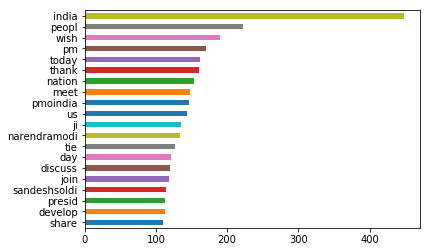

In [130]:
dtm.sum().sort_values(ascending=False).head(20)[::-1].plot.barh()

### Bigrams

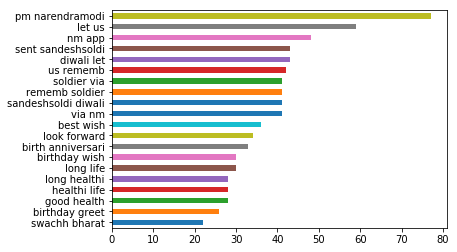

In [138]:
model2 = CountVectorizer(ngram_range=(2,2))
sparse_matrix2 = model2.fit_transform(docs_clean)
dtm2 = pd.DataFrame(sparse_matrix2.toarray(),
                   columns=model2.get_feature_names())
#print(dtm.shape)
#dtm2.head()
dtm2.sum().sort_values(ascending=False).head(20)[::-1].plot.barh()

In [140]:
#help(CountVectorizer)

### Analysis on Amazon Reviews

In [144]:
amazon_data_path = 'https://github.com/skathirmani/datasets/raw/master/amazon_reviews_11.zip'
amazon = pd.read_csv(amazon_data_path)
amazon['reviewText'] = amazon['reviewText'].fillna('')
#amazon.head(1)

### Exercises
1. Create word cloud using wordclouds api
2. Create a bar chart for bag of word analysis
3. Building Document Term Matrix
4. Identify top 5 large documents
5. Identify percentage of zeros in the document term matrix
6. Create a bar chart for top 20 bigrams

### Optional
7. Correlated Features
    - Identify top 50 unigrams
    - Extract the relevant columns from DTM
    - Create a correlation matrix. Identify highly correlated features

## Similarity Analysis

- Cos(0) = 1
- Cos(90) = 0
- Cos(180) = -1

In [152]:
docs = amazon['reviewText']
docs = docs.str.lower()
docs = docs.str.replace('[^a-z#@ ]', '')
docs = docs.str.split(' ')
words_rows = docs.tolist()
words_all = []
words_rows_clean = []
docs_clean = []
for row in words_rows:
    row_words = [stemmer.stem(word) for word in row if word not in stop_words_all]  
    words_rows_clean.append(row_words)
    docs_clean.append(' '.join(row_words))
    words_all.extend(row_words)

    
model = CountVectorizer()
sparse_matrix = model.fit_transform(docs_clean)
dtm = pd.DataFrame(sparse_matrix.toarray(),
                   columns=model.get_feature_names())

In [148]:
from sklearn.metrics.pairwise import cosine_similarity

In [161]:
cosine_similarity([dtm['nook'], dtm['amazon']])

array([[1.        , 0.47979502],
       [0.47979502, 1.        ]])

In [160]:
cosine_similarity([dtm['nook'], dtm['amazon']])[0][1]

0.4797950195876083

In [176]:
def get_similar_words(input_term):
    df_cs = pd.DataFrame(columns=['input_term', 'term', 'cs'])
    for word in dtm.columns:
        cs = cosine_similarity([dtm[word], dtm[input_term]])[0][1]
        df_cs = df_cs.append({'input_term': input_term,
                              'term': word,
                              'cs': cs}, ignore_index=True)
    df_cs = df_cs.sort_values(by='cs', ascending=False)
    df_cs = df_cs[df_cs['input_term'] != df_cs['term']].head(10)
    return df_cs['term'].values

get_similar_words('tablet')

array(['app', 'android', 'invit', 'version', 'netflix', 'seven', 'music',
       'pandora', 'bonusbut', 'membershowev'], dtype=object)

## Twitter Analysis

In [178]:
#tweets.head()

1. Identify all hashtags used by Modi

In [182]:
docs = tweets['text']
docs = docs.str.lower()
docs = docs.str.replace('[^a-z#@ ]', '')
docs = docs.str.split(' ')
words_rows = docs.tolist()
hashtags = []
for row in words_rows:
    row_hashtags = [word for word in row if word.startswith('#')]
    hashtags.extend(row_hashtags)

In [220]:
top_hashtags = pd.Series(hashtags).value_counts().head()
top_hashtags

#sandeshsoldiers      108
#mannkibaat            91
#tirangayatra          84
#yogaday               53
#transformingindia     52
dtype: int64

In [233]:
top_hashtags.index

Index(['#sandeshsoldiers', '#mannkibaat', '#tirangayatra', '#yogaday',
       '#transformingindia'],
      dtype='object')

In [187]:
tweets['date'] = pd.to_datetime(tweets['created_at'])
tweets['date'].head()

0   2017-01-31 11:00:07
1   2017-01-31 10:59:12
2   2017-01-31 10:52:33
3   2017-01-31 10:52:22
4   2017-01-31 10:52:16
Name: date, dtype: datetime64[ns]

In [193]:
tweets['date'].min(), tweets['date'].max()

(Timestamp('2016-03-09 12:22:10'), Timestamp('2017-01-31 11:00:07'))

In [200]:
tweets['month'] = tweets['date'].dt.month
tweets['day'] = tweets['date'].dt.day
tweets['year'] = tweets['date'].dt.year
tweets['month_name'] = tweets['date'].dt.strftime('%b')
tweets['weekday'] = tweets['date'].dt.strftime('%A')

In [202]:
tweets['month_name'].value_counts().head()

Jun    413
Oct    393
Aug    383
May    307
Jul    303
Name: month_name, dtype: int64

In [255]:
tweets['text'] = tweets['text'].str.lower().str.replace('[^a-z#@ ]', '')
tweets['mannkibaat'] = tweets['text'].apply(lambda v: 1 if '#mannkibaat' in 
                                                            v.split(' ') else 0)
tweets['mannkibaat'].value_counts()

0    3129
1      91
Name: mannkibaat, dtype: int64

In [245]:
#tweets[['date', 'sandesh2soldiers']].head()

In [246]:
#tweets.groupby('month')['sandesh2soldiers'].sum()

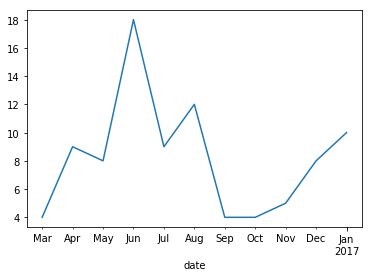

In [256]:
tweets.index = tweets['date']
tweets.resample('1M')['mannkibaat'].sum().plot.line()

In [ ]:
nltk.download()